# Derivada

## Definición

La derivada es una herramienta que nos permite comprender y modelar el cambio en diversas disciplinas como la física, la economía, la ingeniería y el análisis de datos. En física, por ejemplo, la derivada se utiliza para describir la velocidad y la aceleración de un objeto en movimiento. En economía, la derivada se utiliza para analizar las tasas de cambio en variables como la demanda y la oferta. En el ámbito del análisis de datos, la derivada puede ser utilizada para encontrar patrones y tendencias, así como para optimizar algoritmos de aprendizaje automático. 

Matemáticamente, la derivada de una función representa la tasa de cambio instantánea de dicha función en un punto específico. Desde una perspectiva geométrica, la derivada de una función es la pendiente de la recta tangente para cada valor concreto de la función.

A continuación se representa un función, denominada *sigmoide*, y su derivada utilizando la librería *matplotlib*. Como se puede apreciar, la derivada expresa la pendiente en cada punto de la función. En este ejemplo concreto, al principio y al final de la función la tendencia o pendiente es cero y el punto de máxima pendiente se encuentra cuando $x=0$.

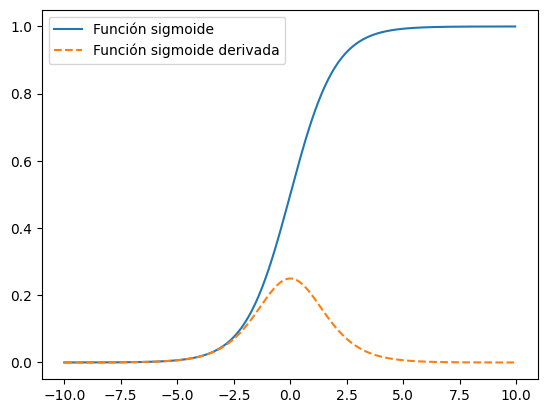

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def sigmoid_derivative(t):
    return sigmoid(t) * (1 - (sigmoid(t)))

x = np.arange(-10, 10, 0.05)
y = [sigmoid(value) for value in x]
y_derivative = [sigmoid_derivative(value) for value in x]
plt.plot(x, y, label='Función sigmoide')
plt.plot(x, y_derivative, '--', label='Función sigmoide derivada')
plt.legend()
plt.show()

## Ejemplos prácticos

En esta sección se presentan una serie de casos prácticos en los que resulta de gran utilidad entender y aplicar la derivada. El primer ejemplo sirve para presentar la derivada y, además, muestra como podemos calcular la velocidad de un objeto en cada instante aplicando esta herramienta.

### Cálculo de velocidades con la derivada

Supongamos que disponemos de la distancia exacta a la que se encuentra un objeto respecto a un observador en cada instante durante diez segundos seguidos. Con esta información, podríamos representar un gráfica tal y como la que se muestra a continuación.

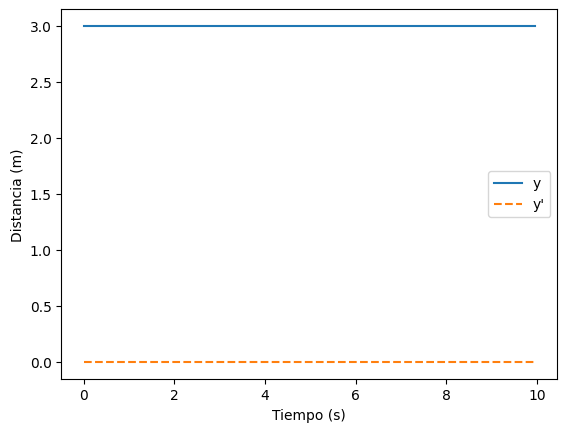

In [2]:
time = np.arange(0, 10, 0.05)
space = [3 for _ in range (len(time))] 
space_derivative = [0 for _ in range (len(time))] 
plt.plot(time, space, label='y')
plt.plot(time, space_derivative, '--', label='y\'')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.show()

En este caso, el objeto que está siendo observado se encuentra a una distancia de tres metros respecto al observador y, dado que esta distancia no se ve alterada a lo largo de los diez segundos, se puede interpretar que dicho objeto no está en movimiento (al menos respecto a su observador). Dicho esto, es fácilmente deducible que la función representada es $y=3$. En este caso, la derivada de $y'$ cobra un sentido muy relevante ya que, como se decía en la introducción, la derivada representa la tendencia o pendiente en cada punto de la función, y es que en este problema la pendiente indica la velocidad. Dicho de otra forma, con la derivada de $y$ somos capaces de obtener la velocidad a la que se mueve el objeto respecto al observador en cualquier instante. Pues bien, siguiendo las reglas de derivación, se puede deducir que la derivada de $y$ es igual a cero $y' = 0$, lo que efectivamente indica que el objeto no se desplaza respecto a su observador. 

Ahora vamos a modificar la gráfica para que esta vez indique que el objeto si se ha desplazado. La siguiente gráfica representa que el objeto se encontraba en el mismo punto que el observador (a una distancia de cero metros), pero al cabo de diez segundos se encuentra a una distancia de diez metros.  

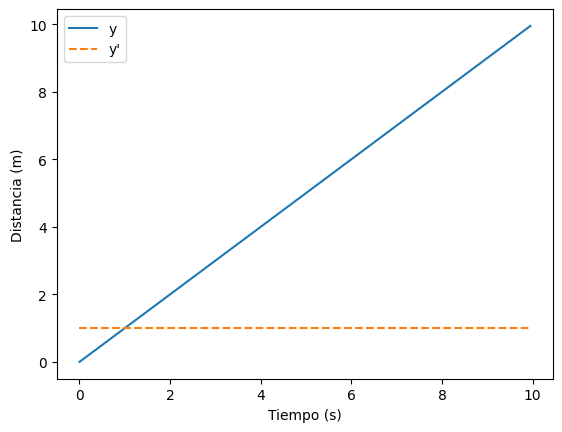

In [3]:
time = np.arange(0, 10, 0.05)
space = np.arange(0, 10, 0.05)
space_derivative = [1 for _ in range(len(space))]
plt.plot(time, space, label='y')
plt.plot(time, space_derivative, '--', label='y\'')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.show()

De nuevo, esta vez también podemos deducir con facilidad cuál es la función que representa el movimiento de nuestro objeto. En este caso $y = x$, ya que a medida que aumenta el tiempo, aumenta la distancia exactamente la misma cantidad. Si ahora calculamos la derivada de $y$, obtenemos que $y' = 1$. Efectivamente, la velocidad a la que se mueve el objeto respecto al observador es de exactamente 1 m/s durante todo el tiempo. 

Ahora vamos a complicar un poco más la función para que el objeto no se mueva a velocidad constante, por ejemplo utilizando una función cuadrática. En este caso también podemos aplicar la misma metodología para saber cuál es la velocidad que ha tenido el objeto en cualquier punto de la función. 

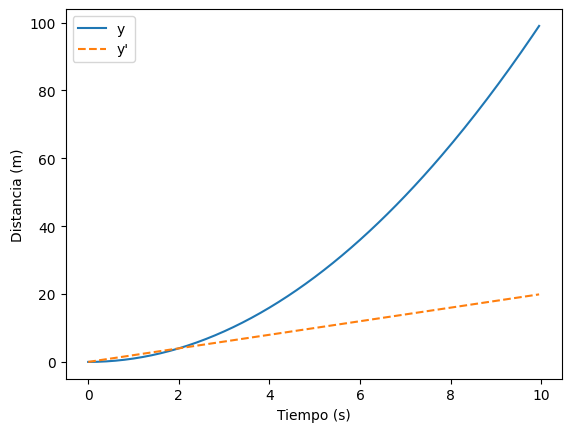

In [4]:
time = np.arange(0, 10, 0.05)
space = time**2  
space_derivative = 2*time
plt.plot(time, space, label='y')
plt.plot(time, space_derivative, '--', label="y'")
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.show()

En este caso, al ser una función cuadrática del tipo $y = x²$, podemos calcular su derivada siendo esta $y' = 2x$. Por tanto, si queremos saber la velocidad en un momento determinado de la función sólo tenemos que resolver $y'$. A continuación se muestran algunos ejemplos.

In [5]:
x = 0
print(f'Velocidad en el instante {x}:{2*x :>4} (m/s)')
x = 4.5
print(f'Velocidad en el instante {x}:{2*x :>4} (m/s)')
x = 10
print(f'Velocidad en el instante {x}:{2*x :>4} (m/s)')

Velocidad en el instante 0:   0 (m/s)
Velocidad en el instante 4.5: 9.0 (m/s)
Velocidad en el instante 10:  20 (m/s)


¿Pero qué ocurre si no conocemos la expresión matemática que representa nuestra función? Pues bien, podemos hacer aproximaciones de la derivada de forma numérica. Esto consite en calcular la diferencia de la tendencia en cada instante respecto al tiempo, tal y como se expresa en la función *gradient* del siguiente código.

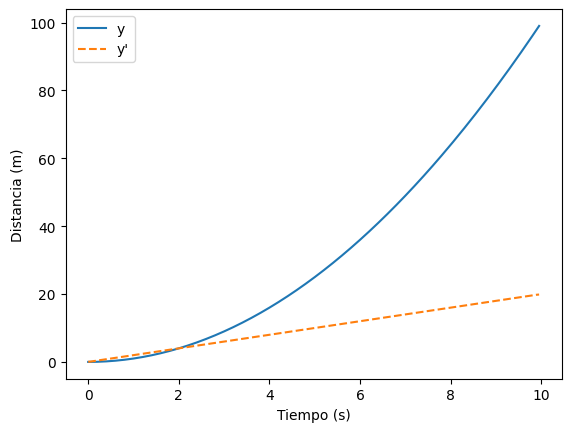

In [6]:
def gradient(space, dt):
    n = len(space)
    derivative = np.zeros(n)
    for i in range(1, n-1):
        derivative[i] = (space[i+1] - space[i-1]) / (2 * dt)
    derivative[0] = (space[1] - space[0]) / dt
    derivative[n-1] = (space[n-1] - space[n-2]) / dt
    return derivative

time = np.arange(0, 10, 0.05)
space = time**2  
space_derivative = gradient(space, time[1] - time[0])

plt.plot(time, space, label='y')
plt.plot(time, space_derivative, '--', label="y'")
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.show()